## Observations and Insights 

Mouse G989 was a duplicate data point that needed to be removed.

The study was well balanced in terms of gender. 

Observing the 4 Drugs:

Observation Box Plot: Between the 4 drugs it seems that Capomulin and Ramicane have the best results of the sample size as the final tumor sizes had the lowest mean.  Infubinol did have an outlier that needs to be investigated and is less effective than both Capomulin and Ramicane.

Capomulin overview:

Capomulin is effective as the tumor size decrease over time

Capomulin shows a strong positive coorelation between weight and tumor size.  We can infer that heavier mice may have a correlation to higher tumor size.  We also have a tight R-squared which will state the results having a mininal variation to the mean.

A supplemental analysis may be digging further in the Weight vs Tumor Size by mice in the total study.  Reviewing the weight correlation to tumor size will add to the validity of the drug.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [9]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [10]:
# Combine the data into a single dataset
combined_data =  pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_data.head()
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [11]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].drop_duplicates()
len(num_mice)


249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Checking the number of mice in the clean DataFrame.
#duplicated function

combined_data.drop_duplicates(subset =["Mouse ID","Timepoint"],
                     keep = False, inplace = True)

combined_data.count()

Mouse ID              1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
dtype: int64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1883.00000,1883.000000,1883.000000,1883.000000,1883.000000
mean,12.77111,25.660648,19.622942,50.449310,1.025491
std,7.18380,3.931950,14.090045,8.914637,1.139284
min,1.00000,15.000000,0.000000,22.050126,0.000000
25%,7.00000,25.000000,5.000000,45.000000,0.000000
50%,13.00000,27.000000,20.000000,48.951368,1.000000
75%,20.00000,29.000000,30.000000,56.346321,2.000000
max,24.00000,30.000000,45.000000,78.567014,4.000000


In [15]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_drug_regimen_df = combined_data.groupby(["Drug Regimen"])
tumor_vol_df= pd.DataFrame({
                                "Mean": round(grouped_drug_regimen_df["Tumor Volume (mm3)"].mean(),2),
                                "Median": round(grouped_drug_regimen_df["Tumor Volume (mm3)"].median(),2),
                                "Variance": round(grouped_drug_regimen_df["Tumor Volume (mm3)"].var(),2),
                                "Standard Deviation": round(grouped_drug_regimen_df["Tumor Volume (mm3)"].std(),2),    
                                "SEM": round(grouped_drug_regimen_df["Tumor Volume (mm3)"].sem(),2),  
                                })
tumor_vol_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# df = pd.DataFrame({'Drug Regimen':combined_data["Drug Regimen"],
#                    'Tumor Volume': combined_data['Tumor Volume (mm3)'],
#                    columns = ['key', 'data1', 'data2'])

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_sum = combined_data.groupby('Drug Regimen').aggregate(["mean","median","var","std","sem"])
round(drug_regimen_sum['Tumor Volume (mm3)'],2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

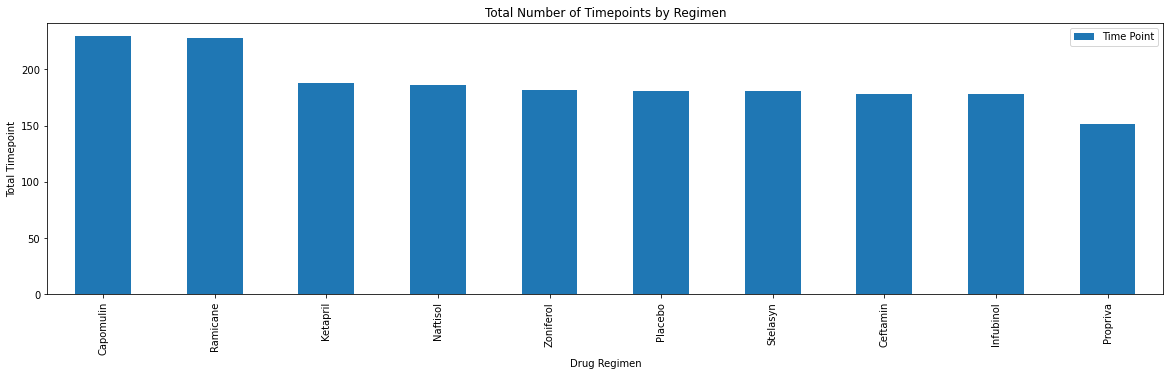

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Pandas can also plot multiple columns if the DataFrame includes them

mouse_regimen_data= pd.DataFrame({
                                "Time Point": round(grouped_drug_regimen_df["Timepoint"].count(),2), 
                                }).sort_values(by="Time Point", ascending = False)
mouse_regimen_data.head()
pd_plt_sum =  mouse_regimen_data.plot(kind="bar", figsize=(20,5))
pd_plt_sum.set_title('Total Number of Timepoints by Regimen')
pd_plt_sum.set_xlabel('Drug Regimen')
pd_plt_sum.set_ylabel('Total Timepoint')

plt.show()
plt.tight_layout()

In [19]:
# DATA SET 1
# drug_regimen = mouse_regimen_data["Drug Regimen"]
mouse_regimen_plt = mouse_regimen_data.reset_index()
timepoint = mouse_regimen_plt["Time Point"]
drug_regimen = mouse_regimen_plt["Drug Regimen"]

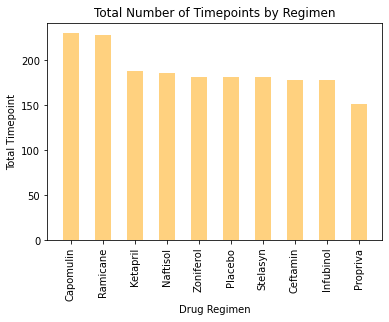

<Figure size 432x288 with 0 Axes>

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(drug_regimen))

tick_location = [value for value in x_axis]
# second way to do this
# tick_location = []
# for x in x_axis:
#     tick_locations.append(x)
    
plt.xticks(tick_location, drug_regimen)
plt.xticks(rotation=90)
plt.bar(drug_regimen, timepoint, color ='orange', alpha = 0.5, align="center",width =.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoint')
plt.title('Total Number of Timepoints by Regimen')
plt.show()
plt.tight_layout()

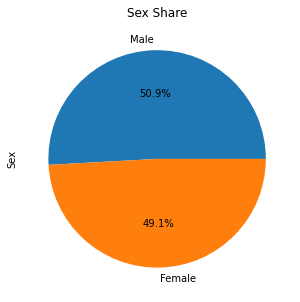

<Figure size 432x288 with 0 Axes>

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = combined_data['Sex'].value_counts()
mouse_sex
pie_sex =  mouse_sex.plot(kind="pie", autopct='%1.1f%%', figsize=(20,5), title = "Sex Share")
plt.show()
plt.tight_layout()

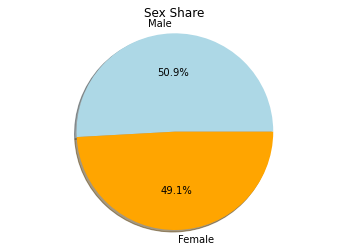

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf = ['Male','Female']
colors = ["lightblue", "orange"]

plt.pie(mouse_sex, labels = mf, colors = colors,
        autopct = "%1.1f%%", shadow = True, startangle = 0)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.title("Sex Share" )
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Table with needed columns to pick out max time point

ft_df= combined_data.filter(['Mouse ID','Timepoint', 'Drug Regimen'], axis=1)
ft_df.head(10)

#Takes timepoint.max() and groups by Mouse ID

max_time = ft_df.groupby(['Mouse ID']).max()
max_time

,Timepoint,Drug Regimen
Mouse ID,,
a203,45,Infubinol
a251,45,Infubinol
a262,45,Placebo
a275,45,Ceftamin
a366,30,Stelasyn
...,...,...
z435,10,Propriva
z578,45,Ramicane
z581,45,Infubinol


In [28]:
#merging the mouse id with time point with volume
# Start by getting the last (greatest) timepoint for each mouse
combined_data_max_time =  pd.merge(max_time, study_results,
                                 how='left', on=['Mouse ID','Timepoint'])
combined_data_max_time

# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge on mouseid and Timeframe
array = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
combined_regimen = combined_data_max_time.loc[combined_data_max_time['Drug Regimen'].isin(array)]
combined_regimen









,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,67.973419,2
1,a251,45,Infubinol,65.525743,1
3,a275,45,Ceftamin,62.999356,3
6,a411,45,Ramicane,38.407618,1
7,a444,45,Ramicane,43.047543,0
...,...,...,...,...,...
239,y769,45,Ceftamin,68.594745,4
240,y793,45,Capomulin,31.896238,2
241,y865,45,Ceftamin,64.729837,3
245,z578,45,Ramicane,30.638696,0


In [40]:



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = combined_regimen['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print('\033[1m' + "Quartiles and Outliers Overview" + '\033[0m')
print("")
print(f"Quartiles")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
print(" ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("Outliers")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
    
    # Determine outliers using upper and lower bounds
    

Quartiles and Outliers Overview

Quartiles
The lower quartile of Tumor Volume is: 37.19
The upper quartile of Tumor Volume is: 59.93
The interquartile range of Tumor Volume is: 22.74
The the median of Tumor Volume is: 45.0 
 
Outliers
Values below 3.07 could be outliers.
Values above 94.04 could be outliers.


/var/folders/fd/z3r1ntv931b76c63_gh69p440000gn/T/ipykernel_13704/1554438891.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(array)


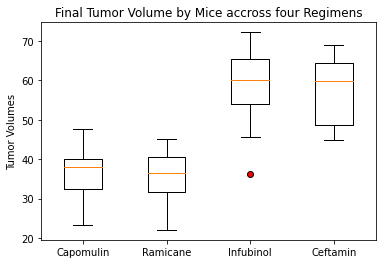

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

 #['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
array = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
capo = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Capomulin']
capo
ram = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Ramicane']
ram
infu = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Infubinol']
infu
ceft = combined_data_max_time.loc[combined_data_max_time['Drug Regimen']=='Ceftamin']
ceft
data = [capo['Tumor Volume (mm3)'], ram['Tumor Volume (mm3)'], infu['Tumor Volume (mm3)'], ceft['Tumor Volume (mm3)']]


red_circle = dict(markerfacecolor = 'r')

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Mice accross four Regimens')
ax1.set_ylabel('Tumor Volumes')
ax1.set_xticklabels(array)
ax1.boxplot(data, flierprops = red_circle)
plt.show()


Observation Box Plot: between the 4 drugs it seems that Capomulin and Ramicane are the best results of the sample size as the final tumor sizs had the lowest mean.  Infubinol did have an outlier that needs to be investigated.

## Line and Scatter Plots

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# capomulin_data = grouped_drug_regimen_df.describe()

# capomulin_data

capomulin_data = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
capomulin_data = combined_data.loc[combined_data["Mouse ID"]=="s185"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


capomulin is effective as the tumor size decrease over time

In [64]:
#capomulin_line = plt.plot(capomulin_data['Tumor Volume (mm3)'],capomulin_data['Timepoint'], color="blue" )
capomulin_line = plt.plot(capomulin_data['Timepoint'],capomulin_data['Tumor Volume (mm3)'], color="blue" )
plt.title("Mouse s185: Tumor Vol vs Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()
# Show the chart


NameError: name 'capomulin_data' is not defined

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data_avg = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
groupby_capomulin_mouse = capomulin_data_avg.groupby(["Mouse ID"]).mean()
groupby_capomulin_mouse.reset_index()


,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,9.0,22.0,22.5,41.963636,0.70
1,b742,7.0,21.0,22.5,40.083699,0.00
2,f966,16.0,17.0,10.0,36.505973,0.00
3,g288,3.0,19.0,22.5,41.990097,0.80
4,g316,22.0,22.0,22.5,44.613344,1.00
5,i557,1.0,24.0,22.5,44.805810,0.20
6,i738,23.0,20.0,22.5,39.141053,0.60
7,j119,7.0,23.0,22.5,44.465236,0.60
8,j246,21.0,21.0,17.5,43.216925,0.25
9,l509,17.0,21.0,22.5,44.434474,1.40


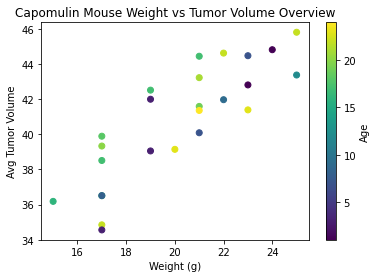

In [68]:
plt.scatter(groupby_capomulin_mouse['Weight (g)'],groupby_capomulin_mouse['Tumor Volume (mm3)'], c = groupby_capomulin_mouse['Age_months'])
clb = plt.colorbar()
clb.set_label("Age")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume")
plt.title("Capomulin Mouse Weight vs Tumor Volume Overview")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.71


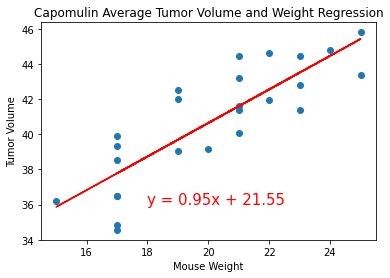

In [139]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(groupby_capomulin_mouse['Weight (g)'],groupby_capomulin_mouse['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
x_values = groupby_capomulin_mouse['Weight (g)']
y_values = groupby_capomulin_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title("Capomulin Average Tumor Volume and Weight Regression")
print(f"The r-squared is: {round(rvalue**2,2)}")
plt.show()




Capomulin show a strong positive coorelation between weight and tumor size.  we can infer that with higher weight you may have a higher tumor size.  we also have a tight R-squared which will state not a large variation to the mean.